# Heart Disease Diagnosis

This demonstration is for prediction from a heart disease diagnosis dataset. This diagonosis contains features in the 
following:
1. Patients' age
2. Gender
3. Differnt chest pain types
4. Patients' blood pressure when they're resting
5. Serum cholesteral level
6. Fasting blood sugar
7. Electrocardiographic results in resting status
8. Maximum heart rate
9. Exercise induced angina
10. ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. A blood disorder called thalassemia 
14. Diagnosis results (yes/no)

Now we're going to dive in the data and see what model will give better prediction.

# Import Python packages:

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier #for the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, precision_score

# Load the dataset

In [4]:
heart_disease=pd.read_csv('heart.csv')
heart_disease.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


Check if there's any null values:

In [5]:
heart_disease.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
heart_disease.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Because the abbreviations are confusing, I decided to alter column names in an understable way:

In [7]:
heart_disease.columns=['age', 'sex', 'chest_pain_type',
                       'resting_blood_pressure', 'cholesterol',
                       'fasting_blood_sugar','rest_ecg',
                       'max_heart_rate_achieved', 'exercise_induced_angina',
                       'st_depression', 'st_slope', 'num_major_vessels',
                       'thalassemia', 'target']
heart_disease.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Distribution (EDA)

A. Check the ratio if this patient is diagnosed to have heart disease or not:

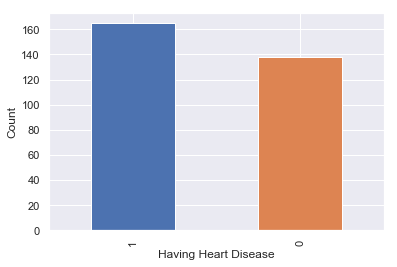

In [8]:
target_count_dist=heart_disease['target'].value_counts()
target_count_dist.plot(kind='bar')
plt.xlabel('Having Heart Disease')
plt.ylabel('Count')
plt.show()

More people with heart disease (target = 1) in this dataset, but the difference is not huge.

B. Gender

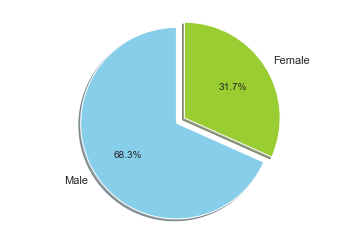

In [9]:
male=len(heart_disease[heart_disease['sex']==1])
female=len(heart_disease[heart_disease['sex']==0])
#plot
labels='Male', 'Female'
sizes=male, female
colors=['skyblue', 'yellowgreen']
explode=[0.1, 0]
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

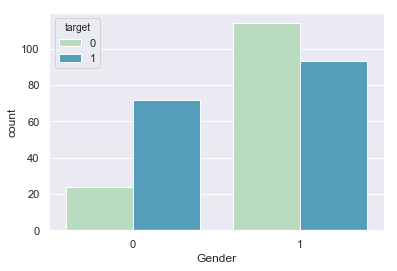

In [10]:
sns.countplot(x='sex',data = heart_disease, hue = 'target',palette='GnBu')
plt.xlabel('Gender')
plt.show()

sex: 1 for male and 0 for female

C. Chest Pain Types

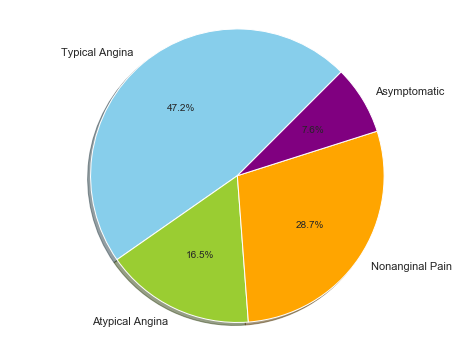

In [11]:
plt.figure(figsize=(8,6))

label_1='Typical Angina', 'Atypical Angina', 'Nonanginal Pain', 'Asymptomatic'
heart_disease['chest_pain_type'].unique()
size_1=[len(heart_disease[heart_disease['chest_pain_type']==0]),
        len(heart_disease[heart_disease['chest_pain_type']==1]),
        len(heart_disease[heart_disease['chest_pain_type']==2]),
        len(heart_disease[heart_disease['chest_pain_type']==3])]
colors=['skyblue', 'yellowgreen', 'orange', 'purple']
explode=[0,0,0,0]
plt.pie(size_1, explode=explode, labels=label_1, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=45)
plt.axis('equal')
plt.show()

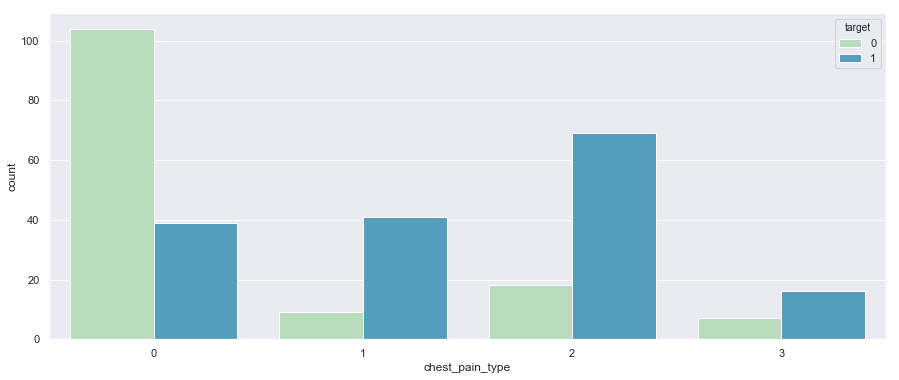

In [12]:
plt.figure(figsize=(15,6))
sns.countplot(x='chest_pain_type',data = heart_disease, hue = 'target',palette='GnBu')
plt.show()

D. Fasting blood sugar

([<matplotlib.patches.Wedge at 0x1a22ff9be0>,
 [Text(1.0717379934039835, -0.5397941028710884, 'Fasting Blood Sugar<120mg/dl'),
  Text(-0.9824264707898638, 0.4948113069558669, 'Fasting Blood Sugar>120mg/dl')],
 [Text(0.6251804961523237, -0.3148798933414682, '85.1%'),
  Text(-0.5358689840671984, 0.2698970765213819, '14.9%')])

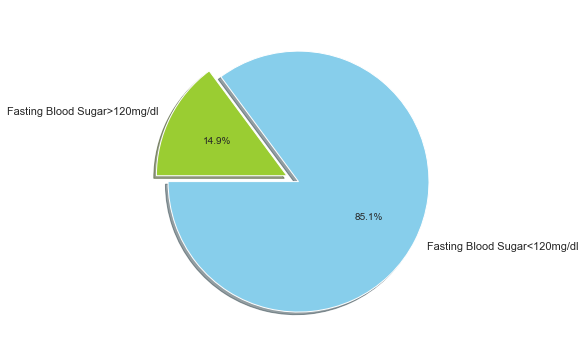

In [13]:
plt.figure(figsize=(8,6))

label_2='Fasting Blood Sugar<120mg/dl', 'Fasting Blood Sugar>120mg/dl'
size_2=[len(heart_disease[heart_disease['fasting_blood_sugar']==0]),
        len(heart_disease[heart_disease['fasting_blood_sugar']==1])]
explode=[0.1,0]
plt.pie(size_2, explode=explode, labels=label_2, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)

E. Exercise-induced angina

([<matplotlib.patches.Wedge at 0x1a22d175c0>,
 [Text(-0.6214195755718447, -1.0265659799039264, 'Yes'),
  Text(0.5696346990453951, 0.9410187615788871, 'No')],
 [Text(-0.3624947524169093, -0.5988301549439571, '32.7%'),
  Text(0.3107098358429427, 0.5132829608612111, '67.3%')])

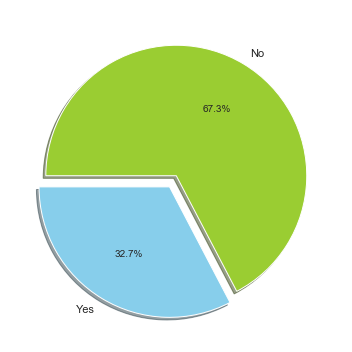

In [14]:
plt.figure(figsize=(8,6))

label_3='Yes', 'No'
size_3=[len(heart_disease[heart_disease['exercise_induced_angina']==1]),
        len(heart_disease[heart_disease['exercise_induced_angina']==0])]
explode=[0.1,0]
plt.pie(size_3, explode=explode, labels=label_3, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)

F. Age vs Heart Disease

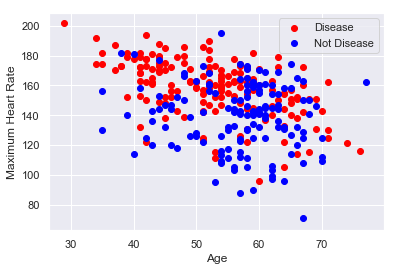

In [15]:
plt.scatter(x=heart_disease.age[heart_disease['target']==1],
            y=heart_disease.max_heart_rate_achieved[heart_disease['target']==1], c='red')
plt.scatter(x=heart_disease.age[heart_disease['target']==0],
            y=heart_disease.max_heart_rate_achieved[heart_disease['target']==0], c='blue')
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

# Correlation

Compare the correlation among features using heatmaps.

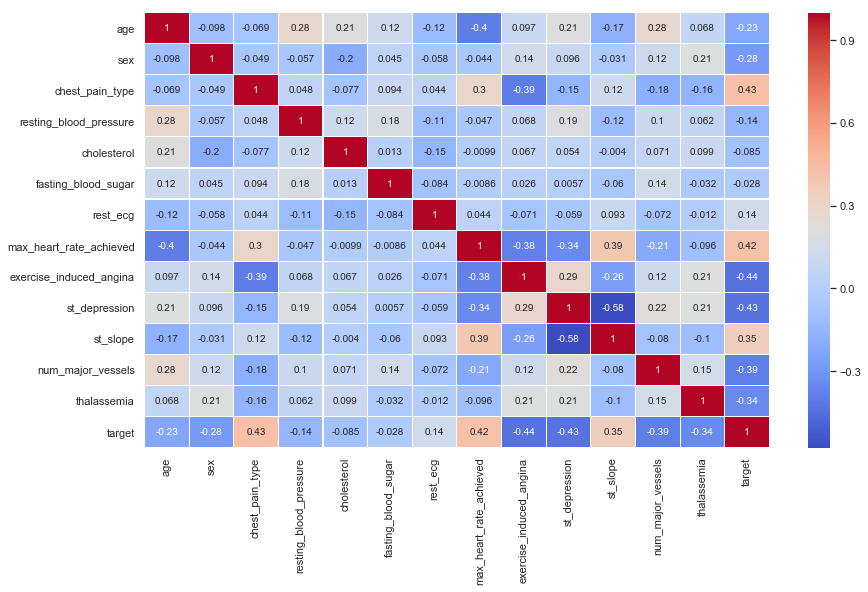

In [16]:
sns.set_style('whitegrid')
plt.figure(figsize=(14,8))
sns.heatmap(heart_disease.corr(), annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

No correlation are higher than 0.5......weired!!

# Prediction Accuracy Analysis

Since we have binnary target values, 0 and 1, implying that this patient is diagnosed to have heart disease or not, we could utilize the information from patients to predict if s/he has heart disease or not.

I will try 3 methods: Logistic Regression, Decision Tree and Random Forest. First, let's split the dataset to training and test set.

In [17]:
#split data
x_train, x_test, y_train, y_test=train_test_split(heart_disease.drop('target', 1),
                                                  heart_disease['target'],test_size=.3,
                                                  random_state=20)

Next we're going to scale features:

In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [19]:
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


# A. Logistic Regression

Let's check what parameter will be fit for this dataset:

In [20]:
logit=LogisticRegression()
params={'penalty':['l1', 'l2'],
        'C':[0.01, 0.1, 1, 10, 100],
        'class_weight':['balanced', None]}
log_model = GridSearchCV(logit,param_grid=params,cv=10)
log_model.fit(x_train, y_train)
log_model.best_params_

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2'}

In [21]:
pred_1 = log_model.predict(x_test)
print('Using Logistic Regression we get an accuracy score of: ',
      round(accuracy_score(y_test,pred_1),5)*100,'%')

Using Logistic Regression we get an accuracy score of:  79.121 %


In [22]:
print(classification_report(y_test,pred_1))

              precision    recall  f1-score   support

           0       0.73      0.82      0.77        39
           1       0.85      0.77      0.81        52

   micro avg       0.79      0.79      0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.80      0.79      0.79        91



Confusion Matrix, sensitivity and specificity:

In [23]:
cnf_1=confusion_matrix(y_test, pred_1)
cnf_1

array([[32,  7],
       [12, 40]])

In [24]:
total_1=sum(sum(cnf_1))
sensitivity_1=cnf_1[0,0]/(cnf_1[0,0] + cnf_1[1,0])
specificity_1=cnf_1[1,1]/(cnf_1[1,1] + cnf_1[0,1])
print('Sensitivity: ', round(sensitivity_1, 3)*100,'%')
print('Specificity: ', round(specificity_1, 3)*100,'%')

Sensitivity:  72.7 %
Specificity:  85.1 %


ROC Curve:

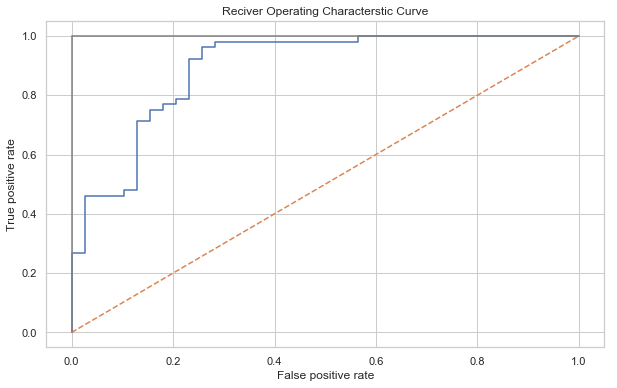

In [25]:
target_probailities_log = log_model.predict_proba(x_test)[:,1]
log_false_positive_rate,log_true_positive_rate,log_threshold = roc_curve(y_test,
                                                             target_probailities_log)
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(log_false_positive_rate,log_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

# B. Decision Tree

How about the parameters if we use decision tree algorithm:

In [26]:
DT= DecisionTreeClassifier(random_state=7)
parameter_1 = {'max_features': ['auto', 'sqrt', 'log2'],
               'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
               'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11]}
tree_model = GridSearchCV(DT, param_grid=parameter_1, n_jobs=-1)
tree_model.fit(x_train, y_train)
tree_model.best_params_

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 14}

In [27]:
pred_2=tree_model.predict(x_test)
print('Using Decision Tree we get an accuracy score of: ',
      round(accuracy_score(y_test,pred_2),5)*100,'%')

Using Decision Tree we get an accuracy score of:  78.022 %


In [28]:
print(classification_report(y_test,pred_2))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74        39
           1       0.80      0.83      0.81        52

   micro avg       0.78      0.78      0.78        91
   macro avg       0.78      0.77      0.77        91
weighted avg       0.78      0.78      0.78        91



Confusion Matrix, sensitivity and specificity:

In [29]:
cnf_2=confusion_matrix(y_test, pred_2)
cnf_2

array([[28, 11],
       [ 9, 43]])

In [30]:
total_1=sum(sum(cnf_2))
sensitivity_2=cnf_2[0,0]/(cnf_2[0,0] + cnf_2[1,0])
specificity_2=cnf_2[1,1]/(cnf_2[1,1] + cnf_2[0,1])
print('Sensitivity: ', round(sensitivity_2,4)*100, '%')
print('Specificity: ', round(specificity_2,4)*100, '%')

Sensitivity:  75.68 %
Specificity:  79.63 %


ROC Curve:

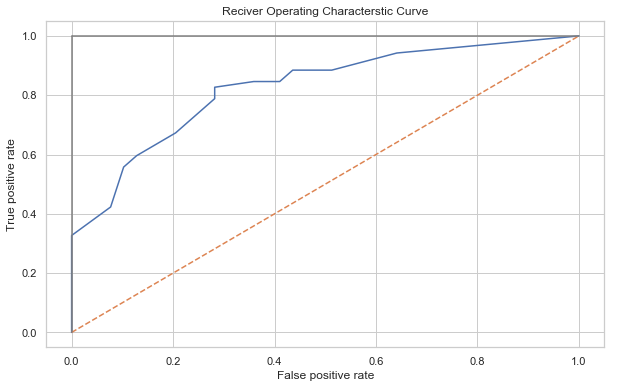

In [31]:
target_probailities_tree = tree_model.predict_proba(x_test)[:,1]
tree_false_positive_rate,tree_true_positive_rate,tree_threshold = roc_curve(y_test,
                                                             target_probailities_tree)

plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(tree_false_positive_rate,tree_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

# C. Random Forest

In [32]:
RF=RandomForestClassifier(random_state=1)
parameter_2={'n_estimators':[200,300,500],
             'max_features':['auto', 'sqrt'],
             'max_depth':[int(i) for i in np.linspace(10, 20, num=2)],
             'min_samples_split':[2], 'min_samples_leaf':[2,4,8],
             'bootstrap':[True]}
RF_model = GridSearchCV(RF, param_grid=parameter_2, n_jobs=-1)
RF_model.fit(x_train, y_train)
RF_model.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 8,
 'min_samples_split': 2,
 'n_estimators': 500}

In [33]:
pred_3=RF_model.predict(x_test)
print('Using Random Forest we get an accuracy score of: ',
      round(accuracy_score(y_test,pred_3),5)*100,'%')

Using Random Forest we get an accuracy score of:  83.516 %


In [34]:
print(classification_report(y_test,pred_3))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82        39
           1       0.89      0.81      0.85        52

   micro avg       0.84      0.84      0.84        91
   macro avg       0.83      0.84      0.83        91
weighted avg       0.84      0.84      0.84        91



Confusion Matrix, sensitivity and specificity:

In [35]:
cnf_3=confusion_matrix(y_test, pred_3)
cnf_3

array([[34,  5],
       [10, 42]])

In [36]:
total_3=sum(sum(cnf_3))
sensitivity_3=cnf_3[0,0]/(cnf_3[0,0] + cnf_3[1,0])
specificity_3=cnf_3[1,1]/(cnf_3[1,1] + cnf_3[0,1])
print('Sensitivity: ', round(sensitivity_3,3)*100, '%')
print('Specificity: ', round(specificity_3,3)*100, '%')

Sensitivity:  77.3 %
Specificity:  89.4 %


ROC Curve:

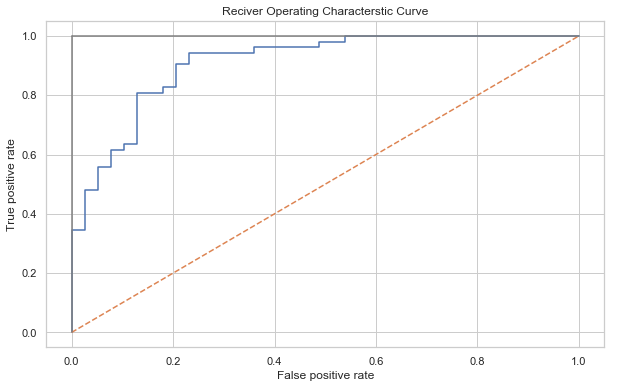

In [37]:
target_probailities_RF = RF_model.predict_proba(x_test)[:,1]
RF_false_positive_rate,RF_true_positive_rate,tree_threshold = roc_curve(y_test,
                                                             target_probailities_RF)

plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(RF_false_positive_rate,RF_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

# Compare accuracy among 3 algorithms:

In [38]:
print('Accuracy score for Logistic Regression:', round(accuracy_score(y_test,pred_1),5)*100, '%')
print('Accuracy score for Decission Tree:', round(accuracy_score(y_test,pred_2),5)*100, '%')
print('Accuracy score for Random Forest:', round(accuracy_score(y_test,pred_3),5)*100, '%')

Accuracy score for Logistic Regression: 79.121 %
Accuracy score for Decission Tree: 78.022 %
Accuracy score for Random Forest: 83.516 %


ROC Curves:

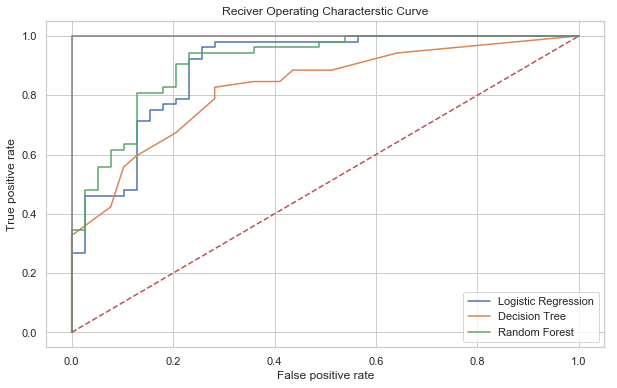

In [39]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(log_false_positive_rate,log_true_positive_rate,label='Logistic Regression')
plt.plot(tree_false_positive_rate,tree_true_positive_rate,label='Decision Tree')
plt.plot(RF_false_positive_rate,RF_true_positive_rate,label='Random Forest')
plt.plot([0,1], ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()